In [0]:
import pandas as pd

In [0]:
# df_users=pd.read_csv('MiniprojURL.csv')

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive/MyDrive/ColabNotebooks/RecommendationSystem/WebScrap/Miniproj/MiniprojURL.csv')

In [15]:
from google.colab import files
uploaded = files.upload()

Saving NewUserData.csv to NewUserData.csv


In [16]:
from google.colab import files
uploaded = files.upload()

Saving MiniprojURL.csv to MiniprojURL.csv


In [0]:
df_users=pd.read_csv('NewUserData.csv')

In [0]:
df_hotels=pd.read_csv('MiniprojURL.csv')

In [19]:
df_users.rename(columns = {'Hotel Name':'Hotel Names'}, inplace = True) 
df_users.head(5)

,User Name,Profile link,Rating,Hotel Names
0,SGP,https://www.tripadvisor.in/Profile/SGP32D,5,Lake Canopy
1,Mattbor86,https://www.tripadvisor.in/Profile/Mattbor86,5,Lake Canopy
2,Montrosa,https://www.tripadvisor.in/Profile/Montrosa,3,Lake Canopy
3,Amit Pednekar,https://www.tripadvisor.in/Profile/amitpednekar,4,Lake Canopy
4,Amittraveler,https://www.tripadvisor.in/Profile/Amittraveler,4,Lake Canopy


In [20]:
df_hotels.head(15)


,Hotel Names,Price,Rating,Amenities,Info,Attractions,Address,City,Latitude,Longitude
0,Lake Palace Resort,$ 82,4.0,Free parkingFree High Speed Internet (WiFi)Fit...,Lake Palace is a Five star luxury backwater re...,"('Kerala Backwaters', 'Alleppey Backwaters', '...","Thirumala Ward,Alleppey Chungam, Alappuzha 688...",Alappuzha,9.493986,76.348986
1,Uday Backwater Resort,$ 62,4.5,Free parkingFree High Speed Internet (WiFi)Fit...,Uday backwater Resort in Alleppy is a destinat...,"('Kerala Backwaters', 'Mararikulam Beach', 'Al...","1x /2A - Avalookunnu .P.O,Punnamada Near punna...",Alappuzha,9.501296,76.354703
2,Ramada by Wyndham Alleppey,$ 68,4.0,Free parkingFree High Speed Internet (WiFi)Fit...,A picturesque 5 Star Classified Resort Hotel a...,NaN,"Nehru Trophy Finishing Point Punnamada, Alappu...",Alappuzha,9.506031,76.347901
3,Kalappura Homestay,$ 12,5.0,Free parkingFree High Speed Internet (WiFi)Fre...,Kalappura homestay is situated in a peaceful &...,NaN,Kalappurackal House Mullackal Road 1 km east o...,Alappuzha,9.498211,76.344440
4,Oxygen Resorts Alleppey,$ 49,5.0,Free parkingFree internetFitness Centre with G...,Oxygen Resorts Allepey is set amidst the tropi...,NaN,"Boat Jetty Road Finishing Point, Alappuzha 688...",Alappuzha,9.501517,76.351700
5,Treebo Tryst Palmyra Grand Suite,$ 24,4.5,Free parkingFree High Speed Internet (WiFi)Sau...,Treebo Palmyra Grand Suite is a premier busine...,NaN,Old Medical College Junction Opp. Tirumala Dev...,Alappuzha,9.489144,76.338737
6,Abad Turtle Beach,$ 89,4.5,Free parkingFree High Speed Internet (WiFi)Sau...,"Spread across an area of 13 acres of land, Tur...","('Kerala Backwaters', 'Mararikulam Beach', 'Al...","Mararikulam, Alappuzha 688567 India",Alappuzha,9.498000,76.333482
7,Lake Palace Resort,$ 82,4.0,Free parkingFree High Speed Internet (WiFi)Fit...,Lake Palace is a Five star luxury backwater re...,"('Kerala Backwaters', 'Alleppey Backwaters', '...","Thirumala Ward,Alleppey Chungam, Alappuzha 688...",Alappuzha,9.493986,76.348986
8,Uday Backwater Resort,$ 62,4.5,Free parkingFree High Speed Internet (WiFi)Fit...,Uday backwater Resort in Alleppy is a destinat...,"('Kerala Backwaters', 'Mararikulam Beach', 'Al...","1x /2A - Avalookunnu .P.O,Punnamada Near punna...",Alappuzha,9.501296,76.354703
9,Ramada by Wyndham Alleppey,$ 68,4.0,Free parkingFree High Speed Internet (WiFi)Fit...,A picturesque 5 Star Classified Resort Hotel a...,NaN,"Nehru Trophy Finishing Point Punnamada, Alappu...",Alappuzha,9.506031,76.347901


In [21]:
df_users.isnull().sum()

User Name       0
Profile link    0
Rating          0
Hotel Names     0
dtype: int64

In [22]:
df_hotels.isnull().sum()

Hotel Names      0
Price          377
Rating          62
Amenities       37
Info            49
Attractions    301
Address          0
City            66
Latitude       746
Longitude      746
dtype: int64

In [23]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 10 columns):
Hotel Names    1026 non-null object
Price          649 non-null object
Rating         964 non-null float64
Amenities      989 non-null object
Info           977 non-null object
Attractions    725 non-null object
Address        1026 non-null object
City           960 non-null object
Latitude       280 non-null float64
Longitude      280 non-null float64
dtypes: float64(3), object(7)
memory usage: 80.3+ KB


In [0]:
df_hotels.drop_duplicates(subset ="Hotel Names", 
                     keep = "first", inplace = True)

## For preprocessing, as of now, iam dropping all null values of rating. 
### Fill with proper values. Area-wise rating

In [0]:
#df_hotels=df_hotels.dropna(subset=['Rating'])


In [0]:
#df_hotels = df_hotels.reset_index(drop=True)


In [25]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 1023
Data columns (total 10 columns):
Hotel Names    988 non-null object
Price          611 non-null object
Rating         926 non-null float64
Amenities      951 non-null object
Info           939 non-null object
Attractions    698 non-null object
Address        988 non-null object
City           922 non-null object
Latitude       262 non-null float64
Longitude      262 non-null float64
dtypes: float64(3), object(7)
memory usage: 84.9+ KB


In [0]:
merge_df=pd.merge(df_users,df_hotels,on='Hotel Names')# why merging on outer

# *Above
https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/

In [0]:
# dropping a column Rating_y
merge_df.drop(['Rating_y'], axis = 1,inplace=True) 


In [28]:
merge_df.head(5)

,User Name,Profile link,Rating_x,Hotel Names,Price,Amenities,Info,Attractions,Address,City,Latitude,Longitude
0,PravDelhi,https://www.tripadvisor.in/Profile/PravDelhi,4,Lake Palace Resort,$ 82,Free parkingFree High Speed Internet (WiFi)Fit...,Lake Palace is a Five star luxury backwater re...,"('Kerala Backwaters', 'Alleppey Backwaters', '...","Thirumala Ward,Alleppey Chungam, Alappuzha 688...",Alappuzha,9.493986,76.348986
1,Suresh R,https://www.tripadvisor.in/Profile/38sureshr,5,Lake Palace Resort,$ 82,Free parkingFree High Speed Internet (WiFi)Fit...,Lake Palace is a Five star luxury backwater re...,"('Kerala Backwaters', 'Alleppey Backwaters', '...","Thirumala Ward,Alleppey Chungam, Alappuzha 688...",Alappuzha,9.493986,76.348986
2,Sunil P,https://www.tripadvisor.in/Profile/SunilP89,5,Lake Palace Resort,$ 82,Free parkingFree High Speed Internet (WiFi)Fit...,Lake Palace is a Five star luxury backwater re...,"('Kerala Backwaters', 'Alleppey Backwaters', '...","Thirumala Ward,Alleppey Chungam, Alappuzha 688...",Alappuzha,9.493986,76.348986
3,Raunak anand,https://www.tripadvisor.in/Profile/raunak_anand,2,Lake Palace Resort,$ 82,Free parkingFree High Speed Internet (WiFi)Fit...,Lake Palace is a Five star luxury backwater re...,"('Kerala Backwaters', 'Alleppey Backwaters', '...","Thirumala Ward,Alleppey Chungam, Alappuzha 688...",Alappuzha,9.493986,76.348986
4,Sunil V,https://www.tripadvisor.in/Profile/Infra_mumbai,5,Lake Palace Resort,$ 82,Free parkingFree High Speed Internet (WiFi)Fit...,Lake Palace is a Five star luxury backwater re...,"('Kerala Backwaters', 'Alleppey Backwaters', '...","Thirumala Ward,Alleppey Chungam, Alappuzha 688...",Alappuzha,9.493986,76.348986


In [29]:
merge_df.isnull().sum()

User Name          0
Profile link       0
Rating_x           0
Hotel Names        0
Price            787
Amenities         22
Info               5
Attractions      753
Address            0
City              20
Latitude        2067
Longitude       2067
dtype: int64

In [30]:
merge_df.nunique()

User Name       2567
Profile link    2625
Rating_x           5
Hotel Names      554
Price            119
Amenities        545
Info             553
Attractions      226
Address          551
City              69
Latitude          85
Longitude         85
dtype: int64

In [31]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2836
Data columns (total 12 columns):
User Name       2837 non-null object
Profile link    2837 non-null object
Rating_x        2837 non-null int64
Hotel Names     2837 non-null object
Price           2050 non-null object
Amenities       2815 non-null object
Info            2832 non-null object
Attractions     2084 non-null object
Address         2837 non-null object
City            2817 non-null object
Latitude        770 non-null float64
Longitude       770 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 288.1+ KB


# Implementation Steps
1. Take city and rating as input from user.
2. Filter cities.
3. Create pivot matrix of / corr of these hotels.
4. Then name hotel as 'xyz' and fill all hotel ratings with rating taken from user.Add this to pivot matrix.
5. Recommend that hotel which has maximum correlation with this hotel 'xyz'

# User-Based Collabortive Filtering

In [32]:
pivot_matrix=merge_df.pivot_table(index='User Name',columns='Hotel Names',values='Rating_x').fillna(0)
pivot_matrix

Hotel Names,60's Green Hills,7 Apple Hotel Aurangabad,7 Seasons Resort & Spa,7 Wonders Hotel,Aaroham By Aamod Resort,Abad Turtle Beach,Adamo The Resort,Aiswarya Hotel,Alleppey Beach Garden,Amanzi Boutique Resort,Amara Blue Magnets,Amara The High Walls,Amarpreet Hotel,Amritara The Zion,Anand Lodge,Anaya Beacon Hotel,Apollo Dimora Hotel,Aranyaka Resorts Munnar,Ashok Hotel,Asokam Beach Resort,Athaang Beach Resort,Badriville Resort,Bansari Greens Resort,"Bara Bungalow Gethia, Nainital",Bear Valley Resort Dalhousie,Bella Vista Resort,Best Holiday Inn,"Best Western Alkapuri, Vadodara",Best Western Yuvraj,Beyond by Sula,Binori A Boutique Hotel,Blue Mermaid Homestay,Brahmaputra Jungle Resort,Brigadiers Cottage,Brightland Resort & Spa,BrijVilla,Bunk Stay Rishikesh,CHAS Swastik Regency Hotel,CLUB7 Beach Resort,Cama Hotel,...,"Trident, Cochin","Trident, Nariman Point",U Tropicana Alibaug,Udaan Hotel Zambala Retreat,Uday Backwater Resort,Uday Samudra Leisure Beach Hotel & Spa,Uday Suites,Unwind Hotels & Resorts,Upper Deck Resort Pvt. Ltd.,Usha Ascot,VITS Aradhana Auberge,Vasundhra Hotel,Vedic Village Spa Resort,Venice Castle,Vicky's Guest House,Vikram Vintage Inn,Vishwaratna Hotel,Vivanta Guwahati,Vivanta Kolkata EM Bypass,Vivanta Vadodara,Warmth Lake Haven,Weekend Nursery and Cottages,WelcomHeritage Ashdale,WelcomHeritage Windsor Lodge,Welcomhotel The Savoy,Westend Hotel,Whispering Palms Beach Resort,White Rann Resort,Wild Elephant Eco Friendly Resort,Wildflower Cottage,Wilson Aruyvedic Beach Resort,Xomotel Ranikhet Heights,Yash Resort,Zostel Aurangabad,Zostel Dalhousie,de Exotica Crest Resort & Spa,goStops Dalhousie,ibis Nashik,ibis Pune Viman Nagar,ibis Styles Goa Calangute Resort
User Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010102015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126kelseyg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1236ken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13milind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yogeshbhojwani,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# Item Based Collabortive Filtering

In [33]:
pivot_matrix1=merge_df.pivot_table(index='Hotel Names',columns='User Name',values='Rating_x').fillna(0)
pivot_matrix1

User Name,1010102015,1126kelseyg,1236ken,13milind,141278,154umesh,1611Raahul,180max,201411pp,20Janine,244syedu,254sandeepd,27ranjan,356antonyr,404Komal,407vvv,433708,433travelover,45RajD,514sajalk,52anshumans,53brinda,549prasadj,574chetanm,59lifetravel,771arpank,794ashwins,82arnoldm,991Nikki,9930947535,@ antonybabumangaly143,@.skdubey,@patel,A Ray,AAA,AAGG369,AAKANKSHA B,AG1954,AGAM S,AKHIL R,...,vergs,vidurvivek,vij2611,vijayata v,vijaydahiya177,vikas k,vikas260978,vikasshetty,vikky,vikrant c,vimaljoshi2020,vin123118,vinay p,vincent,vini,vinoomathur,vipnesh,virendra198,vishal Chaudhary,vishal j,vishalchandrasali451,vishalpchheda,vivek Dwivedi,vivek t,vkapadia1,vp244333703,vtanaji,wacky_shruti,wanderer*,wanderin_star,wedonttravelenough,yamunabhuchar,yeshu D,yogendra nath dhingra,yogesh k,yogeshbhojwani,yogeshjw,yogeshp453,yukti399,zzmehul
Hotel Names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60's Green Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7 Apple Hotel Aurangabad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7 Seasons Resort & Spa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7 Wonders Hotel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaroham By Aamod Resort,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
de Exotica Crest Resort & Spa,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
goStops Dalhousie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ibis Nashik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [34]:
(pivot_matrix.notnull().sum(axis=1))

User Name
1010102015        554
1126kelseyg       554
1236ken           554
13milind          554
141278            554
                 ... 
yogeshbhojwani    554
yogeshjw          554
yogeshp453        554
yukti399          554
zzmehul           554
Length: 2567, dtype: int64

In [35]:
(pivot_matrix1.notnull().sum(axis=1))

Hotel Names
60's Green Hills                    2567
7 Apple Hotel Aurangabad            2567
7 Seasons Resort & Spa              2567
7 Wonders Hotel                     2567
Aaroham By Aamod Resort             2567
                                    ... 
de Exotica Crest Resort & Spa       2567
goStops Dalhousie                   2567
ibis Nashik                         2567
ibis Pune Viman Nagar               2567
ibis Styles Goa Calangute Resort    2567
Length: 554, dtype: int64

## Print values greater than 1
## *Above

In [36]:
hname=pivot_matrix['7 Apple Hotel Aurangabad']
hname

User Name
1010102015        0.0
1126kelseyg       0.0
1236ken           0.0
13milind          0.0
141278            0.0
                 ... 
yogeshbhojwani    0.0
yogeshjw          0.0
yogeshp453        0.0
yukti399          0.0
zzmehul           0.0
Name: 7 Apple Hotel Aurangabad, Length: 2567, dtype: float64

# 1.<u>**Using Corrwith**</u>
Drawbacks:-1.Data not linearly distributed. 
           2.Data isn't continuous
 
**Inspite of this, same is done movie recommendation systems**

 Here below, Correlation of one hotel is found with whole df

In [0]:
rec_hname=pivot_matrix.corrwith(hname)# can use kendal, spearmann method too

In [38]:
rec_hname

Hotel Names
60's Green Hills                   -0.001929
7 Apple Hotel Aurangabad            1.000000
7 Seasons Resort & Spa             -0.001940
7 Wonders Hotel                    -0.001684
Aaroham By Aamod Resort            -0.001940
                                      ...   
de Exotica Crest Resort & Spa      -0.001812
goStops Dalhousie                  -0.001854
ibis Nashik                        -0.001933
ibis Pune Viman Nagar              -0.001940
ibis Styles Goa Calangute Resort   -0.001940
Length: 554, dtype: float64

# *Above

In [0]:
corr_with=pd.DataFrame(rec_hname,columns=['Correlation'])
corr_with.dropna(inplace=True)
corr_with.sort_values(['Correlation'],ascending=False,inplace=True)

In [40]:
corr_with

,Correlation
Hotel Names,
7 Apple Hotel Aurangabad,1.000000
Dingle House,-0.000867
Sarang Lodging & Boarding,-0.000867
Anand Lodge,-0.000867
OYO 41352 The Hotel By Summair Sports Club,-0.000867
...,...
Fortune Inn Haveli,-0.001940
The Evergrand Palace,-0.002200
Hotel Centre Point,-0.002586


# ---------------------------------------------------------------------------------------------------------------------------------------------

# Understanding corrwith

In [41]:
# importing pandas as pd 
import pandas as pd 

# Creating the first dataframe 
df1 = pd.DataFrame({"A":[1, 6, 7, 8], 
					"B":[5, 2, 4, 3], 
					"C":[10, 3, 9, 3]}) 

# Creating the second dataframe 
df2 = pd.DataFrame({"A":[2, 6, 8, 10], 
					"B":[11, 2, 4, 3], 
					"C":[4, 3, 8, 5]}) 

# Print the first dataframe 
print(df1, "\n") 

# Print the second dataframe 
print(df2) 


   A  B   C
0  1  5  10
1  6  2   3
2  7  4   9
3  8  3   3 

    A   B  C
0   2  11  4
1   6   2  3
2   8   4  8
3  10   3  5


In [42]:
df1.corrwith(df2,axis=0)

A    0.973035
B    0.885438
C    0.449636
dtype: float64

In [43]:
df1.corrwith(df2,axis=1)

0    0.148601
1    1.000000
2    0.917663
3    0.960769
dtype: float64

In [0]:
import seaborn as sn

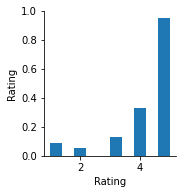

In [45]:
sn.pairplot(df_users)

# ---------------------------------------------------------------------------------------------------------------------------------------------

# <u>Corrwith and Corr are almost same.</u>
First one computes correlation with another dataframe:-
between rows or columns of two DataFrame objects

The second one computes it with itself:-
Compute pairwise correlation of columns

In this model, **same work is done**, as data passed.


# 2.<u>**Using Corr**</u>

In [0]:
corr1=pivot_matrix.corr()# can use kendal, spearmann method too

# *Above

In [47]:
corr1

Hotel Names,60's Green Hills,7 Apple Hotel Aurangabad,7 Seasons Resort & Spa,7 Wonders Hotel,Aaroham By Aamod Resort,Abad Turtle Beach,Adamo The Resort,Aiswarya Hotel,Alleppey Beach Garden,Amanzi Boutique Resort,Amara Blue Magnets,Amara The High Walls,Amarpreet Hotel,Amritara The Zion,Anand Lodge,Anaya Beacon Hotel,Apollo Dimora Hotel,Aranyaka Resorts Munnar,Ashok Hotel,Asokam Beach Resort,Athaang Beach Resort,Badriville Resort,Bansari Greens Resort,"Bara Bungalow Gethia, Nainital",Bear Valley Resort Dalhousie,Bella Vista Resort,Best Holiday Inn,"Best Western Alkapuri, Vadodara",Best Western Yuvraj,Beyond by Sula,Binori A Boutique Hotel,Blue Mermaid Homestay,Brahmaputra Jungle Resort,Brigadiers Cottage,Brightland Resort & Spa,BrijVilla,Bunk Stay Rishikesh,CHAS Swastik Regency Hotel,CLUB7 Beach Resort,Cama Hotel,...,"Trident, Cochin","Trident, Nariman Point",U Tropicana Alibaug,Udaan Hotel Zambala Retreat,Uday Backwater Resort,Uday Samudra Leisure Beach Hotel & Spa,Uday Suites,Unwind Hotels & Resorts,Upper Deck Resort Pvt. Ltd.,Usha Ascot,VITS Aradhana Auberge,Vasundhra Hotel,Vedic Village Spa Resort,Venice Castle,Vicky's Guest House,Vikram Vintage Inn,Vishwaratna Hotel,Vivanta Guwahati,Vivanta Kolkata EM Bypass,Vivanta Vadodara,Warmth Lake Haven,Weekend Nursery and Cottages,WelcomHeritage Ashdale,WelcomHeritage Windsor Lodge,Welcomhotel The Savoy,Westend Hotel,Whispering Palms Beach Resort,White Rann Resort,Wild Elephant Eco Friendly Resort,Wildflower Cottage,Wilson Aruyvedic Beach Resort,Xomotel Ranikhet Heights,Yash Resort,Zostel Aurangabad,Zostel Dalhousie,de Exotica Crest Resort & Spa,goStops Dalhousie,ibis Nashik,ibis Pune Viman Nagar,ibis Styles Goa Calangute Resort
Hotel Names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60's Green Hills,1.000000,-0.001929,-0.001941,-0.001685,-0.001941,-0.001934,-0.001930,-0.001930,-0.001934,-0.001909,-0.001941,-0.001689,-0.001941,-0.001930,-0.000867,-0.001941,-0.001929,-0.001930,-0.001934,-0.001930,-0.001941,-0.001909,-0.001728,-0.001941,-0.001910,-0.001934,-0.001890,-0.001791,-0.001569,-0.001872,-0.001941,-0.001909,-0.001941,-0.001912,-0.001802,-0.001941,-0.001941,-0.001890,-0.001788,-0.001930,...,-0.001934,-0.001912,-0.001912,-0.001941,-0.001929,-0.001941,-0.001941,-0.001870,-0.001909,-0.001791,-0.001934,-0.001494,-0.001934,-0.001934,-0.001941,-0.001910,-0.001813,-0.001934,-0.001941,-0.001941,-0.001934,-0.001850,-0.001941,-0.001850,-0.001941,-0.001929,-0.001930,-0.001934,-0.001813,-0.001941,-0.001870,-0.001809,-0.001910,-0.001813,-0.001941,-0.001813,-0.001855,-0.001934,-0.001941,-0.001941
7 Apple Hotel Aurangabad,-0.001929,1.000000,-0.001940,-0.001684,-0.001940,-0.001933,-0.001929,-0.001929,-0.001933,-0.001908,-0.001940,-0.001688,-0.001940,-0.001929,-0.000867,-0.001940,-0.001928,-0.001929,-0.001933,-0.001929,-0.001940,-0.001908,-0.001727,-0.001940,-0.001909,-0.001933,-0.001889,-0.001790,-0.001569,-0.001871,-0.001940,-0.001908,-0.001940,-0.001911,-0.001801,-0.001940,-0.001940,-0.001889,-0.001787,-0.001929,...,-0.001933,-0.001911,-0.001911,-0.001940,-0.001928,-0.001940,-0.001940,-0.001869,-0.001908,-0.001790,-0.001933,-0.001493,-0.001933,-0.001933,-0.001940,-0.001909,-0.001812,-0.001933,-0.001940,-0.001940,-0.001933,-0.001849,-0.001940,-0.001849,-0.001940,-0.001928,-0.001929,-0.001933,-0.001812,-0.001940,-0.001869,-0.001808,-0.001909,-0.001812,-0.001940,-0.001812,-0.001854,-0.001933,-0.001940,-0.001940
7 Seasons Resort & Spa,-0.001941,-0.001940,1.000000,-0.001694,-0.001952,-0.001945,-0.001941,-0.001941,-0.001945,-0.001920,-0.001952,-0.001699,-0.001952,-0.001941,-0.000872,-0.001952,-0.001940,-0.001941,-0.001945,-0.001941,-0.001952,-0.001920,-0.001738,-0.001952,-0.001921,-0.001945,-0.001900,-0.001801,-0.001578,-0.001883,-0.001952,-0.001920,-0.001952,-0.001923,-0.001812,-0.001952,-0.001952,-0.001900,-0.001798,-0.001941,...,-0.001945,-0.001923,-0.001923,-0.001952,-0.001940,-0.001952,-0.001952,-0.001880,-0.001920,-0.001801,-0.001945,-0.001502,-0.001945,-0

#3. <u>**KNN**</u>
Reason for using Knn: Most people ask their trusted friends for restaurant or movie suggestions.


# *SEE THIS
See diff. between knn and kmeans


In [0]:
from scipy.sparse import csr_matrix
#For more efficient calculation and less memory footprint, we need to transform the values of the dataframe into a scipy sparse matrix.

In [0]:
knn_matrix=csr_matrix(pivot_matrix1)

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
model_knn=NearestNeighbors(algorithm='brute')

In [54]:
model_knn.fit(knn_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [0]:
import numpy as np


In [56]:
query_index = 1; #np.random.choice(corr1.shape[0])
#print(query_index)
distances, indices = model_knn.kneighbors(pivot_matrix1.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)
print(pivot_matrix1.iloc[query_index,:].values.reshape(1,-1).shape)

(1, 2567)


In [57]:
print("List of list",distances,'\n Only List',distances.flatten())
print(distances.shape,(distances.flatten()).shape)


List of list [[ 0.          9.94987437  9.94987437 10.29563014 10.34408043 10.34408043
  10.34408043 10.67707825 10.67707825 10.67707825]] 
 Only List [ 0.          9.94987437  9.94987437 10.29563014 10.34408043 10.34408043
 10.34408043 10.67707825 10.67707825 10.67707825]
(1, 10) (10,)


In [58]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix1.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_matrix1.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 7 Apple Hotel Aurangabad:

1: OYO 10292 Niharika Guest House, with distance of 9.9498743710662:
2: OYO 28260 Hotel Ganga Sagar, with distance of 9.9498743710662:
3: Hotel Sumanglam, with distance of 10.295630140987:
4: Riverside Inn, with distance of 10.344080432788601:
5: Mint Amba Suites, with distance of 10.344080432788601:
6: OYO 27907 Greater Kailash The Palace, with distance of 10.344080432788601:
7: OYO 7917 Hotel Sunbeam, with distance of 10.677078252031311:
8: Anand Lodge, with distance of 10.677078252031311:
9: Sharmin Rose Cottage, with distance of 10.677078252031311:


# *Above
Explore metric paramater. Why corr1 is used?

# Using pivot_matrix1:-
**Why is cosine better than euclidean distance**:- . KNN’s performance will suffer from curse of dimensionality if it uses “euclidean distance” in its objective function.  Euclidean distance is unhelpful in high dimensions because all vectors are almost equidistant to the search query vector (target movie’s features). Instead, we will use cosine similarity for nearest neighbor search.

**There is also another popular approach to handle nearest neighbor search in high dimensional data, locality sensitive hashing, which we won’t cover in this post**

Below recommendations are given if metric parameter is **'cosine'**





Recommendations for 7 Apple Hotel Aurangabad:

1. Rann Home Stay Resort, with distance of 1.0.
2. Ramada Resort by Wyndham Kochi, with distance of 1.0.
3. Ramada by Wyndham Alleppey, with distance of 1.0.
4. Ramada by Wyndham Dehradun Chakrata Road, with distance of 1.0.
5. Ramee Grand Hotel Pune, with distance of 1.0.
6. Ramee Panchshil, with distance of 1.0.
7. Rann Bhoomi Home Stay, with distance of 1.0.
8. Ram Yoga House, with distance of 1.0.
9. Regency Lagoon Resort and Convention, with distance of 1.0.
--------------------------------------------------------------------------------

Below recommendations are given if metric parameter is **'Minkowski'**

Recommendations for 7 Apple Hotel Aurangabad:

1. OYO 10292 Niharika Guest House, with distance of 9.9498743710662.
2. OYO 28260 Hotel Ganga Sagar, with distance of 9.9498743710662.
3. Hotel Sumanglam, with distance of 10.295630140987.
4. Riverside Inn, with distance of 10.344080432788601.
5. Mint Amba Suites, with distance of 10.344080432788601.
6. OYO 27907 Greater Kailash The Palace, with distance of 10.344080432788601.
7. OYO 7917 Hotel Sunbeam, with distance of 10.677078252031311.
8. Anand Lodge, with distance of 10.677078252031311.
9. Sharmin Rose Cottage, with distance of 10.677078252031311.

# **<u>Issues with KNN-Based Collaborative Filtering</u>**
1. **<u>popularity bias</u>**: The system is biased towards hotels that have the most user interaction (i.e. ratings).

2. **<u>item cold-start problem</u>**: When a new hotel is added to the list, it has a lot less user interaction and thus will rarely occur as a recommendation.

3. **<u>scalability issue</u>**: The issue of managing a hotel-user dataset matrix as the count of users and hotels increase, since the matrix that we will deal with will have 90% of the values being 0. Storing such a sparse matrix wastes space when the database accommodates millions of users and movies

# **<u>Questions</u>**
1. Use of content and collabortive i.e. advantage of using these in hotel recommendation.

2. How to see if data is linear or not .(For corrwith).Reason for using it

3. Working of Knn. Reason for using it.

4. **<u>Cold Start Problem:</u>**- As of now, no cold start problem as we aren't recommending user a place. User preference are taken for hotel recommendation.Popular places can be shown to user if at all recommending him a place.If so then add column for no. of visits of users like in movie rec.

5. The Evaluation:
  1.   MSE:-
  Netflix gave the Root Mean Square Error(RMSE) as the key performance metric   (KPI). Using this data if any team or individual can build an algorithm which can reduce the RMSE of the actual rating(which Netflix provided) and the predicted rating(which the competitor’s algorithm will predict) by more than    10% of the RMSE — which Netflix already has — will win the competition.  See link:-https://medium.com/datadriveninvestor/how-to-built-a-recommender-system-rs-616c988d64b2.
  In order to **solve this problem** there are methods:
    1. **Stochastic Gradient Descent(SGD)**: Here, we can calculate derivative of above equation with respect to qi and with respect to pu.
    2. **Alternating Least Squares(ALS):**

6. The hotel industry thrives on location, tourists look for a hotel that is possibly nearest to downtown and / or must-visit attractions of the city. Therefore, every hotel would brag about it if it is not too far from the hotel.
    **How would you handle the attractions part?**

7. Part 3--> Matrix Optimizations:-
https://towardsdatascience.com/the-4-recommendation-engines-that-can-predict-your-movie-tastes-109dc4e10c52

8. Make function.
9. More models.
10. Use MinMaxScaler for removing rating bias of 1-5.https://medium.com/learning-machine-learning/recommending-animes-using-nearest-neighbors-61320a1a5934



Days:-3 27-full day,28-full day,#29


[5,2,3],[8,4,6],[9]

Done:
3,

# **<u>Answers</u>**
2. **Linear data**:- 2, Hotels data are compared i.e. if rows of these 2 hotels increase/decrease/remains same and then correlation is found

3. Knn used here is **supervised** learning algorithm. It is called as lazy learner because it plots the data points without using train/test data and stores in its memory. Then for making the recommendation on unseen sample, it plots the unseen sample and searches in the memory for nearest distance/angle.Why is lazy? Because it does not explicitly learns the model, but it saves all the training data.

 **<u>Reason fo using</u>**:-  KNN is a perfect go-to model and also a very good baseline for recommender system development.

In [0]:
#https://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib

In [60]:
!pip3 install surprise

In [61]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9319  0.9379  0.9433  0.9282  0.9355  0.9354  0.0051  
MAE (testset)     0.7323  0.7412  0.7427  0.7327  0.7381  0.7374  0.0043  
Fit time          4.65    4.65    4.69    4.69    4.65    4.66    0.02    
Test time         0.13    0.22    0.13    0.21    0.13    0.17    0.04    


{'fit_time': (4.652756452560425,
  4.646213054656982,
  4.691307783126831,
  4.687639236450195,
  4.6463751792907715),
 'test_mae': array([0.73225293, 0.74122507, 0.74268155, 0.73267281, 0.73808104]),
 'test_rmse': array([0.9318661 , 0.93789826, 0.94327058, 0.92824065, 0.93552065]),
 'test_time': (0.13488292694091797,
  0.21674418449401855,
  0.13463139533996582,
  0.21355128288269043,
  0.13227558135986328)}

In [62]:
datanew=pd.DataFrame(data)

ValueError: ignored

In [0]:
import surprise
from surprise import Reader, Dataset
from surprise import accuracy
from surprise import SVD

In [0]:
cross_validate(algo, data1, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [0]:
data1 = merge_df[['User Name', 'Hotel Names', 'Rating_x']]


In [66]:
data1.head()

,User Name,Hotel Names,Rating_x
0,PravDelhi,Lake Palace Resort,4
1,Suresh R,Lake Palace Resort,5
2,Sunil P,Lake Palace Resort,5
3,Raunak anand,Lake Palace Resort,2
4,Sunil V,Lake Palace Resort,5


In [0]:
reader = Reader()
data = Dataset.load_from_df(data1[['User Name', 'Hotel Names', 'Rating_x']], reader)

In [0]:
# df_users.rename(columns = {'Hotel Name':'Hotel Names'}, inplace = True) 


In [0]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [73]:
from surprise import SVD, accuracy, KNNWithMeans
algo = KNNWithMeans()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [0]:
predictions = algo.test(testset)


In [76]:
predictions

[Prediction(uid='Just_1_tripper', iid='Samarth ATC', r_ui=5.0, est=4.319228960977903, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='SHAZIA KHAN', iid='LE GRAND', r_ui=5.0, est=4.319228960977903, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Nico T', iid='Sea View Holiday Home', r_ui=5.0, est=4.319228960977903, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='amitchhaperia', iid='Vikram Vintage Inn', r_ui=3.0, est=4.319228960977903, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Naman malik', iid='JW Marriott Mussoorie Walnut Grove Resort & Spa', r_ui=5.0, est=4.319228960977903, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Dr Mena', iid='Ginger Guwahati', r_ui=3.0, est=4.319228960977903, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'

In [75]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.0186


1.0186335948275655